In [ ]:
pip install mlxtend

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Step 1: Load data from each text file
file_paths = ["/content/drive/MyDrive/CS699-AS1-2-3-4-5/Group01_Assignment1_code/Group01/LS_Group01/Class1.txt",
              "/content/drive/MyDrive/CS699-AS1-2-3-4-5/Group01_Assignment1_code/Group01/LS_Group01/Class2.txt",
              "/content/drive/MyDrive/CS699-AS1-2-3-4-5/Group01_Assignment1_code/Group01/LS_Group01/Class3.txt"]

# Load data for each class
data = []
labels = []

for i, file_path in enumerate(file_paths):
    class_data = np.loadtxt(file_path)
    labels.extend([i] * class_data.shape[0])
    data.append(class_data)

# Combine data from all classes
X = np.vstack(data)
y = np.array(labels)

# Step 2: Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 1 Mixtures:
Accuracy: 0.3288888888888889
Precision for each class: [0.32888889 0.         0.        ]
Recall for each class: [1. 0. 0.]
F-measure for each class: [0.49498328 0.         0.        ]
Mean Precision: 0.10962962962962963
Mean Recall: 0.3333333333333333
Mean F-measure: 0.1649944258639911
Confusion Matrix:
[[148   0   0]
 [141   0   0]
 [161   0   0]]



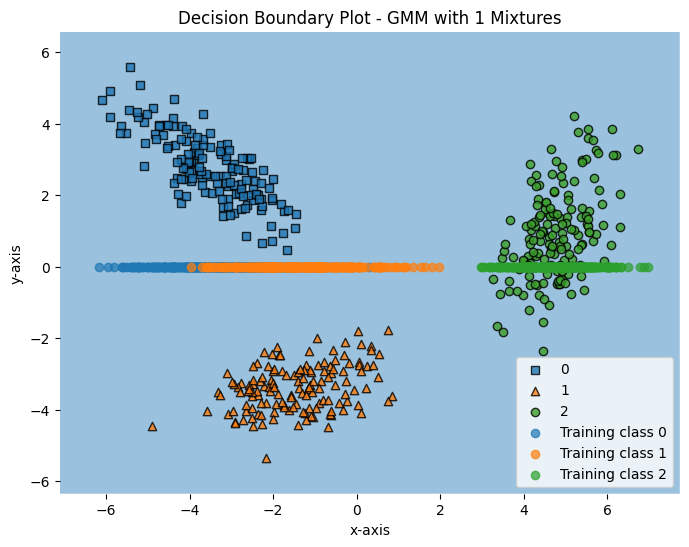

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 2 Mixtures:
Accuracy: 0.0
Precision for each class: [0. 0. 0.]
Recall for each class: [0. 0. 0.]
F-measure for each class: [0. 0. 0.]
Mean Precision: 0.0
Mean Recall: 0.0
Mean F-measure: 0.0
Confusion Matrix:
[[  0 148   0]
 [141   0   0]
 [161   0   0]]



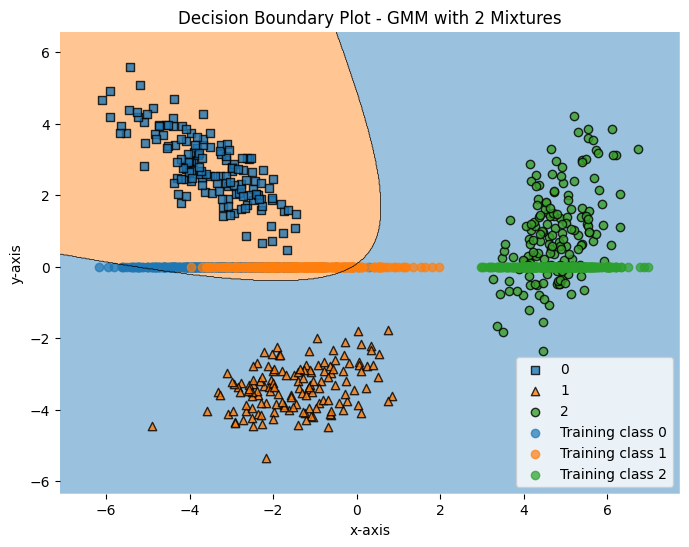

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 4 Mixtures:
Accuracy: 0.0
Precision for each class: [0. 0. 0. 0.]
Recall for each class: [0. 0. 0. 0.]
F-measure for each class: [0. 0. 0. 0.]
Mean Precision: 0.0
Mean Recall: 0.0
Mean F-measure: 0.0
Confusion Matrix:
[[  0   0 148   0]
 [141   0   0   0]
 [  0  88   0  73]
 [  0   0   0   0]]



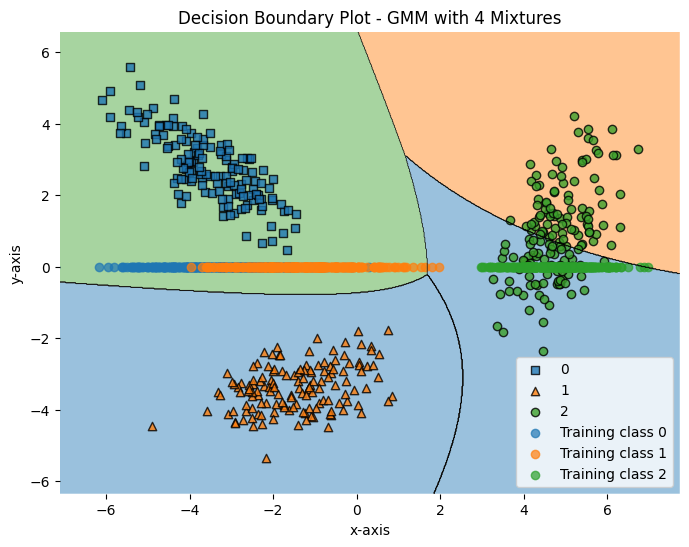

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 8 Mixtures:
Accuracy: 0.0
Precision for each class: [0. 0. 0. 0. 0. 0. 0. 0.]
Recall for each class: [0. 0. 0. 0. 0. 0. 0. 0.]
F-measure for each class: [0. 0. 0. 0. 0. 0. 0. 0.]
Mean Precision: 0.0
Mean Recall: 0.0
Mean F-measure: 0.0
Confusion Matrix:
[[ 0 25  0 57  0  0 66  0]
 [ 0  0 63  0  0 78  0  0]
 [41  0  0  0 39  0  0 81]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]



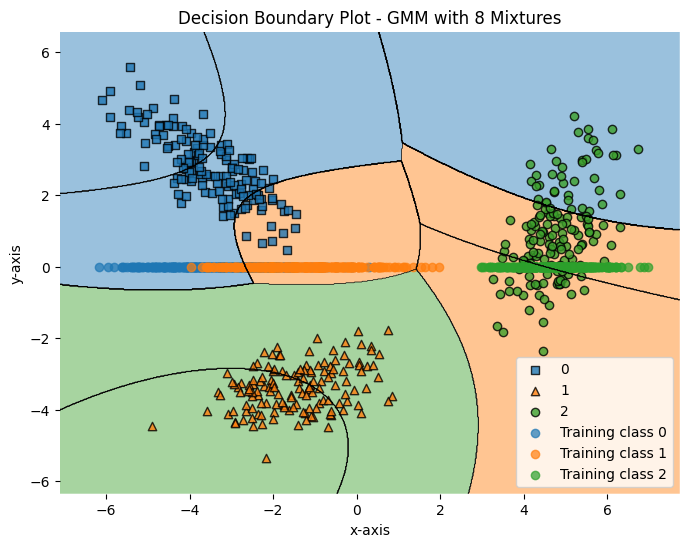

In [ ]:
# Step 3: Apply Fisher Linear Discriminant Analysis (FDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 4: Train Bayes classifiers with GMM for different values of mixtures
mixtures = [1, 2, 4, 8]
gmm_models = [GaussianMixture(n_components=m).fit(X_train_lda) for m in mixtures]

# Step 5: Evaluate and print the performance metrics
for i, gmm in enumerate(gmm_models):
    y_pred_gmm = gmm.predict(X_test_lda)

    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
    precision_gmm = precision_score(y_test, y_pred_gmm, average=None)
    recall_gmm = recall_score(y_test, y_pred_gmm, average=None)
    f1_gmm = f1_score(y_test, y_pred_gmm, average=None)

    mean_precision_gmm = np.mean(precision_gmm)
    mean_recall_gmm = np.mean(recall_gmm)
    mean_f1_gmm = np.mean(f1_gmm)

    conf_matrix_gmm = confusion_matrix(y_test, y_pred_gmm)

    print(f'Performance Metrics for GMM with {mixtures[i]} Mixtures:')
    print(f'Accuracy: {accuracy_gmm}')
    print(f'Precision for each class: {precision_gmm}')
    print(f'Recall for each class: {recall_gmm}')
    print(f'F-measure for each class: {f1_gmm}')
    print(f'Mean Precision: {mean_precision_gmm}')
    print(f'Mean Recall: {mean_recall_gmm}')
    print(f'Mean F-measure: {mean_f1_gmm}')
    print(f'Confusion Matrix:\n{conf_matrix_gmm}\n')

    # Decision region plots with superimposed 1-dimensional reduced dimensional representation of training data
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_test_lda, y_test, clf=gmm, legend=2)

    for c in np.unique(y_train):
        plt.scatter(X_train_lda[y_train == c, 0], np.zeros(np.sum(y_train == c)),
                    label=f'Training class {c}', marker='o', alpha=0.7)

    plt.title(f'Decision Boundary Plot - GMM with {mixtures[i]} Mixtures')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.show()


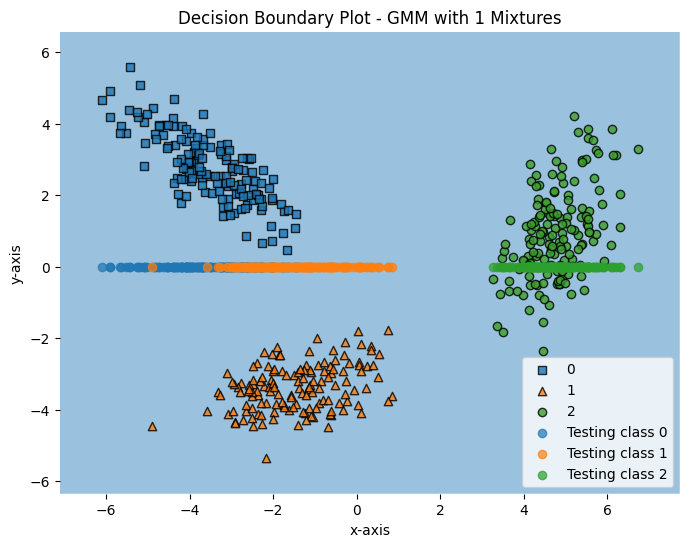

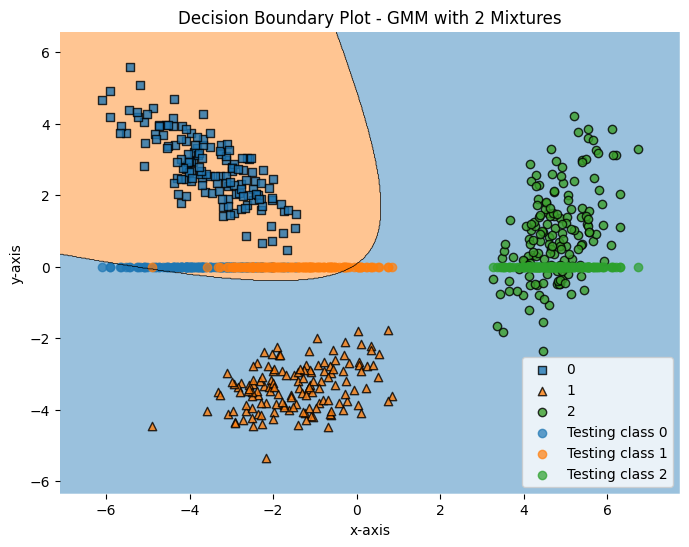

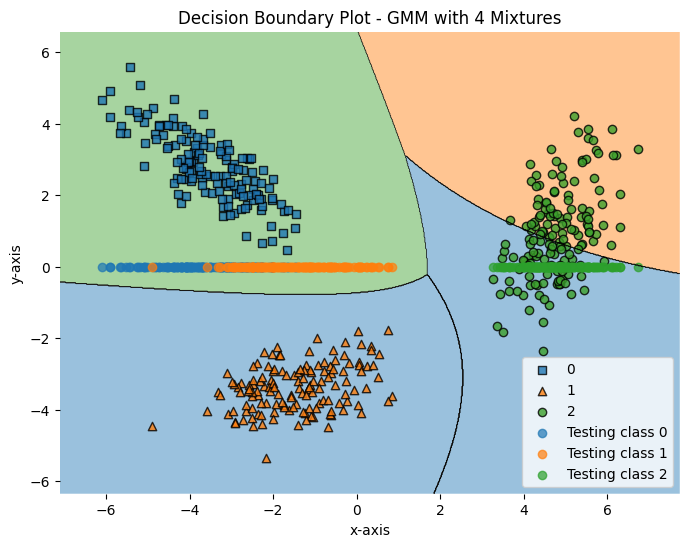

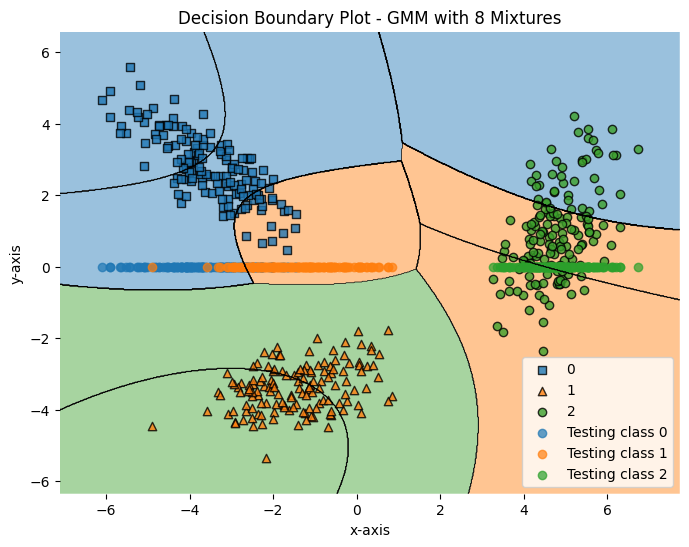

In [ ]:
for i, gmm in enumerate(gmm_models):
    # Decision region plots with superimposed 1-dimensional reduced-dimensional representation of testing data
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_test_lda, y_test, clf=gmm, legend=2)

    # Superimpose the 1-dimensional reduced-dimensional representation of testing data
    for c in np.unique(y_test):
        plt.scatter(X_test_lda[y_test == c, 0], np.zeros(np.sum(y_test == c)),
                    label=f'Testing class {c}', marker='o', alpha=0.7)

    plt.title(f'Decision Boundary Plot - GMM with {mixtures[i]} Mixtures')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.show()

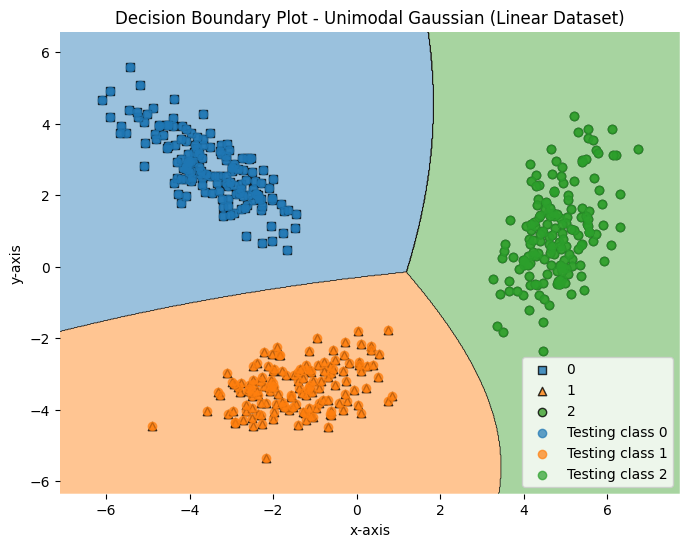

In [ ]:
# Train a Bayesian classifier using unimodal Gaussian
gnb = GaussianNB()
gnb.fit(X_train_lda, y_train)

# Step 5: Visualize the decision boundary for unimodal Gaussian
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test_lda, y_test, clf=gnb, legend=2)

# Superimpose the 2-dimensional reduced-dimensional representation of testing data
for c in np.unique(y_test):
    plt.scatter(X_test_lda[y_test == c, 0], X_test_lda[y_test == c, 1],
                label=f'Testing class {c}', marker='o', alpha=0.7)

plt.title('Decision Boundary Plot - Unimodal Gaussian (Linear Dataset)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

#Data-1(b)

In [ ]:
# Step 1: Load data from each text file
file_paths = ["/content/drive/MyDrive/CS699-AS1-2-3-4-5/Group01_Assignment1_code/Group01/NLS_Group01/class1.txt",
              "/content/drive/MyDrive/CS699-AS1-2-3-4-5/Group01_Assignment1_code/Group01/NLS_Group01/class2.txt",
              "/content/drive/MyDrive/CS699-AS1-2-3-4-5/Group01_Assignment1_code/Group01/NLS_Group01/class3.txt"]

# Load data for each class
data = []
labels = []

for i, file_path in enumerate(file_paths):
    class_data = np.loadtxt(file_path)
    labels.extend([i] * class_data.shape[0])
    data.append(class_data)

# Combine data from all classes
X = np.vstack(data)
y = np.array(labels)


# Step 2: Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 1 Mixtures:
Accuracy: 0.14814814814814814
Precision for each class: [0.14814815 0.         0.        ]
Recall for each class: [1. 0. 0.]
F-measure for each class: [0.25806452 0.         0.        ]
Mean Precision: 0.04938271604938271
Mean Recall: 0.3333333333333333
Mean F-measure: 0.08602150537634408
Confusion Matrix:
[[ 80   0   0]
 [157   0   0]
 [303   0   0]]



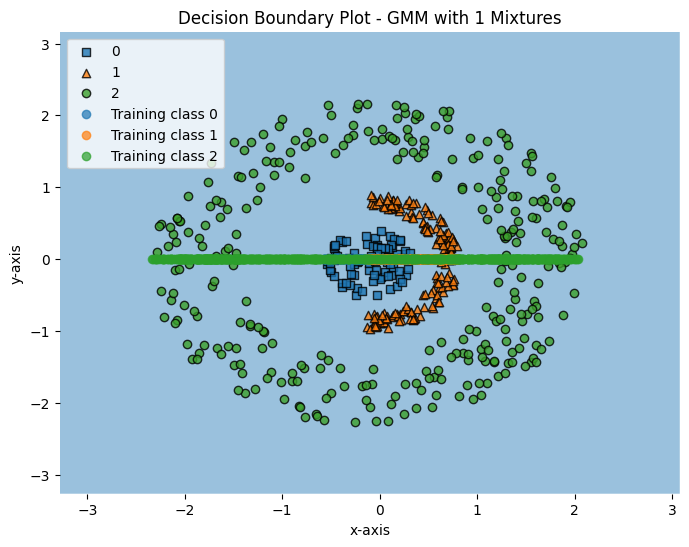

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 2 Mixtures:
Accuracy: 0.29074074074074074
Precision for each class: [0.         0.34204793 0.        ]
Recall for each class: [0. 1. 0.]
F-measure for each class: [0.         0.50974026 0.        ]
Mean Precision: 0.11401597676107479
Mean Recall: 0.3333333333333333
Mean F-measure: 0.1699134199134199
Confusion Matrix:
[[  0  80   0]
 [  0 157   0]
 [ 81 222   0]]



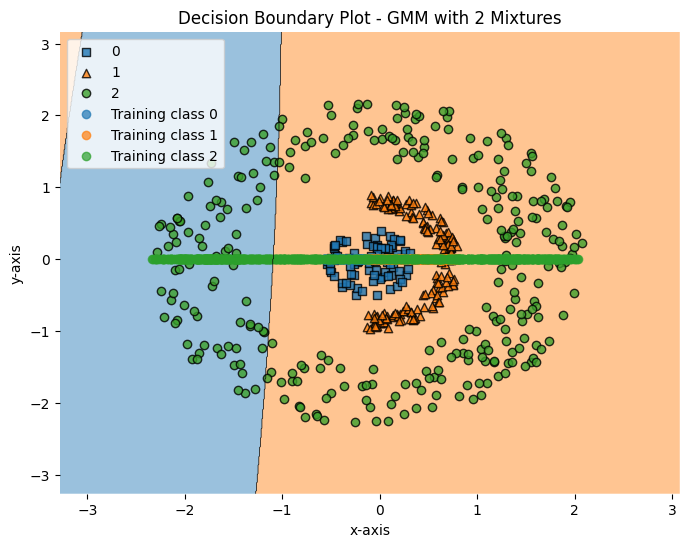

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 4 Mixtures:
Accuracy: 0.12407407407407407
Precision for each class: [0.         0.05426357 1.         0.        ]
Recall for each class: [0.         0.04458599 0.1980198  0.        ]
F-measure for each class: [0.         0.04895105 0.33057851 0.        ]
Mean Precision: 0.26356589147286824
Mean Recall: 0.06065144731033613
Mean F-measure: 0.0948823903369358
Confusion Matrix:
[[  0   0   0  80]
 [  0   7   0 150]
 [ 61 122  60  60]
 [  0   0   0   0]]



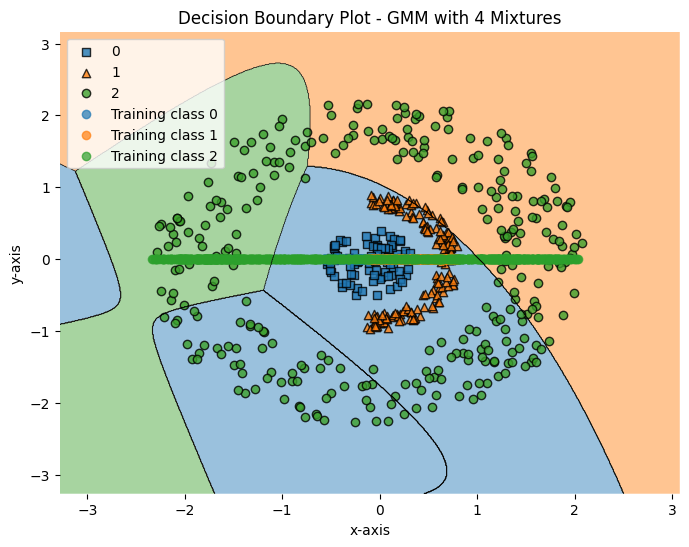

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 8 Mixtures:
Accuracy: 0.06111111111111111
Precision for each class: [0. 0. 1. 0. 0. 0. 0. 0.]
Recall for each class: [0.         0.         0.10891089 0.         0.         0.
 0.         0.        ]
F-measure for each class: [0.         0.         0.19642857 0.         0.         0.
 0.         0.        ]
Mean Precision: 0.125
Mean Recall: 0.013613861386138614
Mean F-measure: 0.024553571428571425
Confusion Matrix:
[[ 0  0  0  5  0 75  0  0]
 [ 0  0  0 97  0 60  0  0]
 [64 58 33  1 40  0 69 38]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]



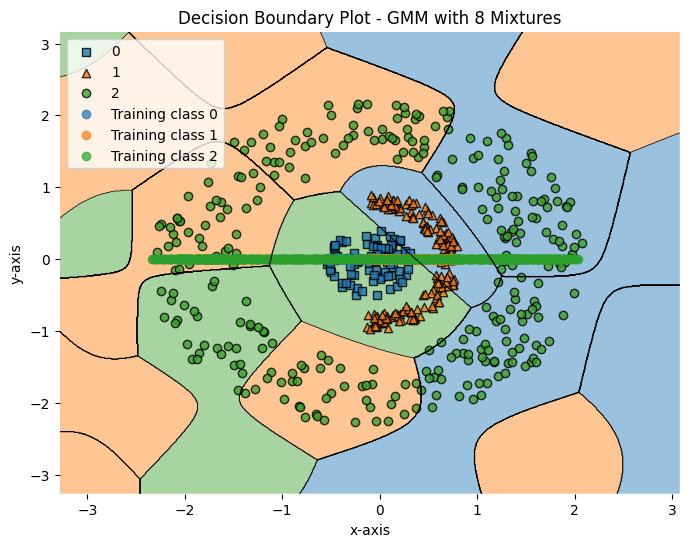

In [ ]:
# Step 3: Apply Fisher Linear Discriminant Analysis (FDA)
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 4: Train Bayes classifiers with GMM for different values of mixtures
mixtures = [1, 2, 4, 8]
gmm_models = [GaussianMixture(n_components=m).fit(X_train_lda) for m in mixtures]

# Step 5: Evaluate and print the performance metrics
for i, gmm in enumerate(gmm_models):
    y_pred_gmm = gmm.predict(X_test_lda)

    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
    precision_gmm = precision_score(y_test, y_pred_gmm, average=None)
    recall_gmm = recall_score(y_test, y_pred_gmm, average=None)
    f1_gmm = f1_score(y_test, y_pred_gmm, average=None)

    mean_precision_gmm = np.mean(precision_gmm)
    mean_recall_gmm = np.mean(recall_gmm)
    mean_f1_gmm = np.mean(f1_gmm)

    conf_matrix_gmm = confusion_matrix(y_test, y_pred_gmm)

    print(f'Performance Metrics for GMM with {mixtures[i]} Mixtures:')
    print(f'Accuracy: {accuracy_gmm}')
    print(f'Precision for each class: {precision_gmm}')
    print(f'Recall for each class: {recall_gmm}')
    print(f'F-measure for each class: {f1_gmm}')
    print(f'Mean Precision: {mean_precision_gmm}')
    print(f'Mean Recall: {mean_recall_gmm}')
    print(f'Mean F-measure: {mean_f1_gmm}')
    print(f'Confusion Matrix:\n{conf_matrix_gmm}\n')

    # Decision region plots with superimposed 1-dimensional reduced dimensional representation of training data
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_test_lda, y_test, clf=gmm, legend=2)

    for c in np.unique(y_train):
        plt.scatter(X_train_lda[y_train == c, 0], np.zeros(np.sum(y_train == c)),
                    label=f'Training class {c}', marker='o', alpha=0.7)

    plt.title(f'Decision Boundary Plot - GMM with {mixtures[i]} Mixtures')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.show()


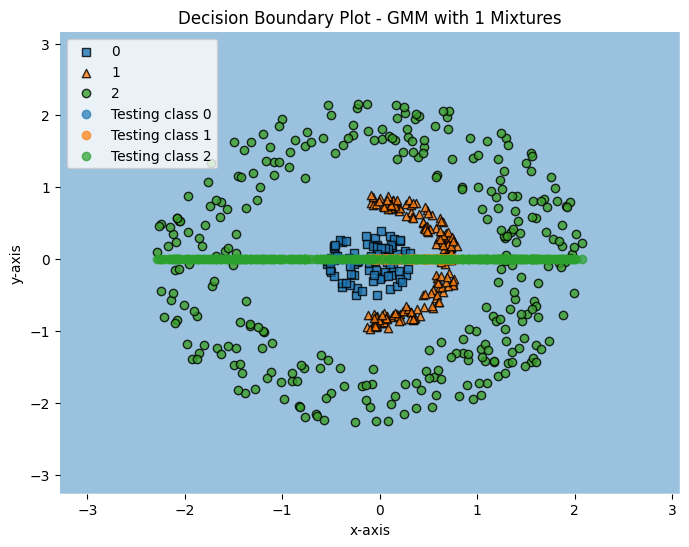

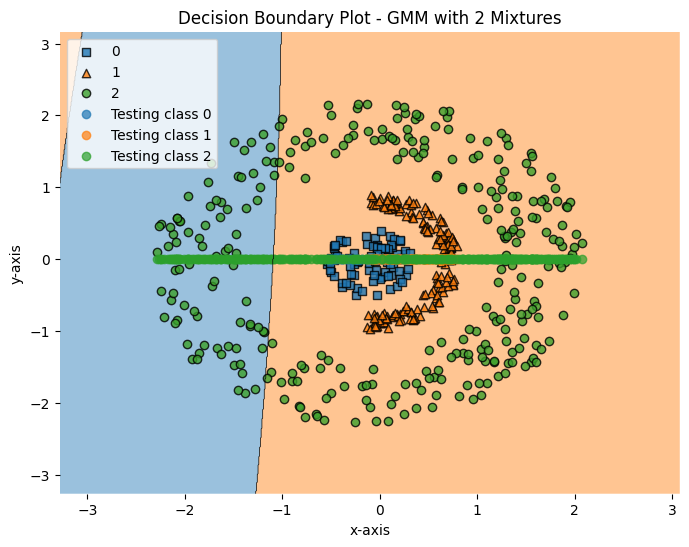

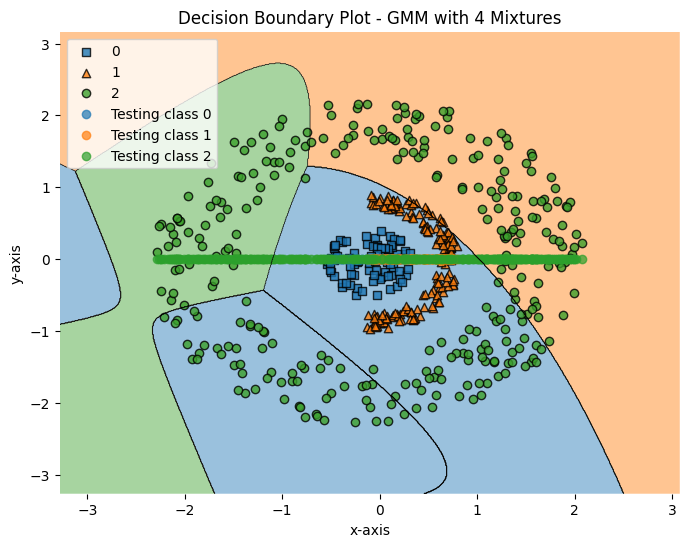

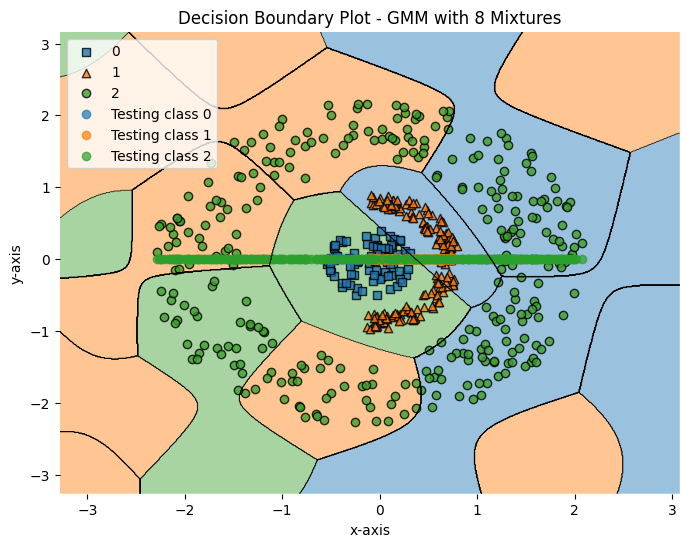

In [ ]:
for i, gmm in enumerate(gmm_models):
    # Decision region plots with superimposed 1-dimensional reduced-dimensional representation of testing data
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_test_lda, y_test, clf=gmm, legend=2)

    # Superimpose the 1-dimensional reduced-dimensional representation of testing data
    for c in np.unique(y_test):
        plt.scatter(X_test_lda[y_test == c, 0], np.zeros(np.sum(y_test == c)),
                    label=f'Testing class {c}', marker='o', alpha=0.7)

    plt.title(f'Decision Boundary Plot - GMM with {mixtures[i]} Mixtures')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.show()

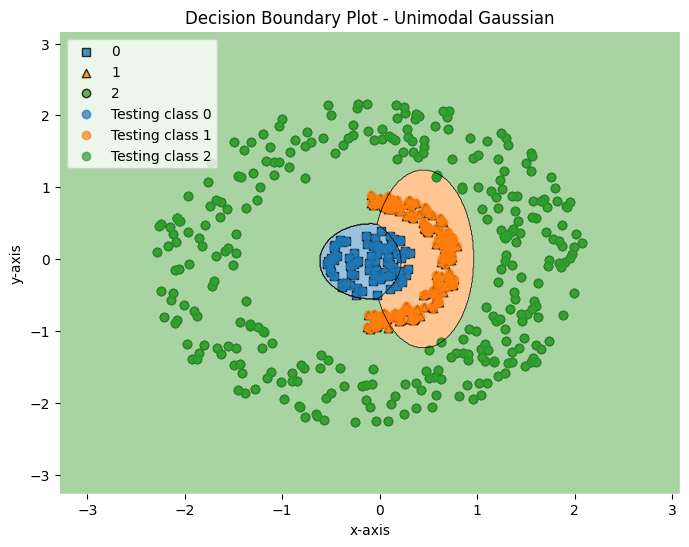

In [ ]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test_lda, y_test, clf=gnb, legend=2)

# Superimpose the 2-dimensional reduced-dimensional representation of testing data
for c in np.unique(y_test):
    plt.scatter(X_test_lda[y_test == c, 0], X_test_lda[y_test == c, 1],
                label=f'Testing class {c}', marker='o', alpha=0.7)

plt.title('Decision Boundary Plot - Unimodal Gaussian')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()

#Data-2

In [ ]:
import os
import numpy as np

train_folder = "/content/drive/MyDrive/CS699-AS1-2-3-4-5/Group01_Assignment5_code/BOVW/train"

train_data = []
train_labels = []

class_folders = os.listdir(train_folder)
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(train_folder, class_folder)
    files = os.listdir(class_path)

    for file in files:
        file_path = os.path.join(class_path, file)
        bovw_representation = np.load(file_path)
        train_data.append(bovw_representation)
        train_labels.append(i)

X_train = np.vstack(train_data)
y_train = np.array(train_labels)


In [ ]:
test_folder = "/content/drive/MyDrive/CS699-AS1-2-3-4-5/Group01_Assignment5_code/BOVW/test"

test_data = []
test_labels = []

class_folders = os.listdir(test_folder)
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(test_folder, class_folder)
    files = os.listdir(class_path)

    for file in files:
        file_path = os.path.join(class_path, file)
        bovw_representation = np.load(file_path)
        test_data.append(bovw_representation)
        test_labels.append(i)
X_test = np.vstack(test_data)
y_test = np.array(test_labels)


In [ ]:
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 1 Mixtures:
Accuracy: 0.3333333333333333
Precision for each class: [0.33333333 0.         0.        ]
Recall for each class: [1. 0. 0.]
F-measure for each class: [0.5 0.  0. ]
Mean Precision: 0.1111111111111111
Mean Recall: 0.3333333333333333
Mean F-measure: 0.16666666666666666
Confusion Matrix:
[[50  0  0]
 [50  0  0]
 [50  0  0]]



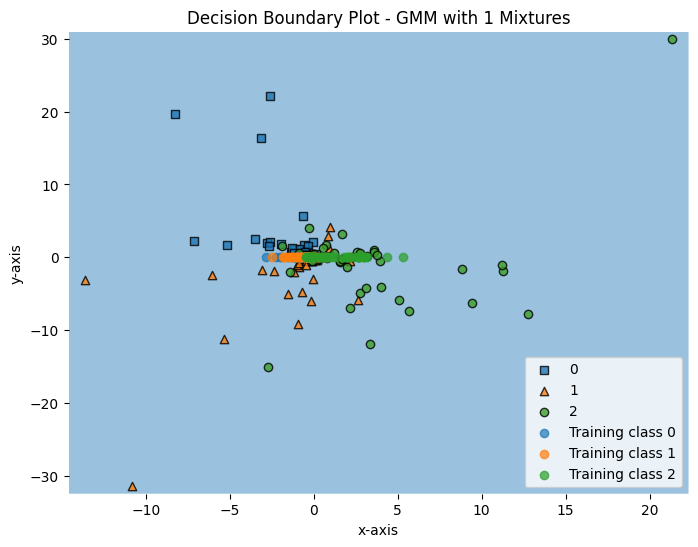

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 2 Mixtures:
Accuracy: 0.28
Precision for each class: [0.         0.29787234 0.        ]
Recall for each class: [0.   0.84 0.  ]
F-measure for each class: [0.         0.43979058 0.        ]
Mean Precision: 0.09929078014184396
Mean Recall: 0.27999999999999997
Mean F-measure: 0.14659685863874344
Confusion Matrix:
[[ 0 50  0]
 [ 8 42  0]
 [ 1 49  0]]



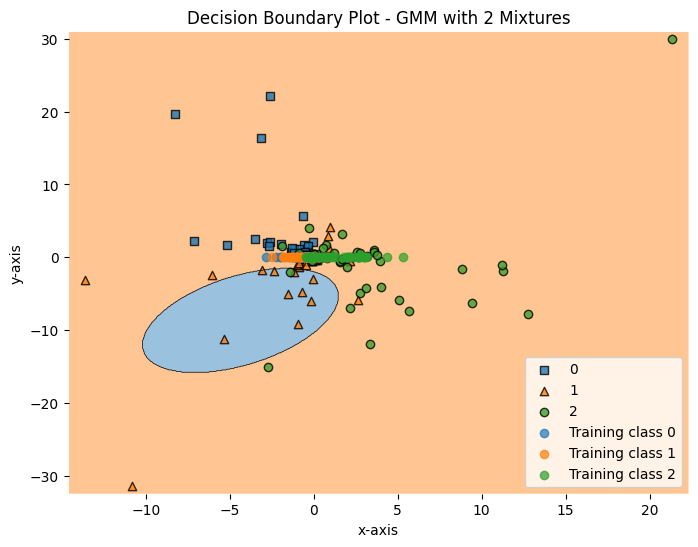

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 4 Mixtures:
Accuracy: 0.43333333333333335
Precision for each class: [0.38181818 0.39130435 0.89473684 0.        ]
Recall for each class: [0.42 0.54 0.34 0.  ]
F-measure for each class: [0.4        0.45378151 0.49275362 0.        ]
Mean Precision: 0.416964842937383
Mean Recall: 0.325
Mean F-measure: 0.33663378394836196
Confusion Matrix:
[[21 29  0  0]
 [15 27  2  6]
 [19 13 17  1]
 [ 0  0  0  0]]



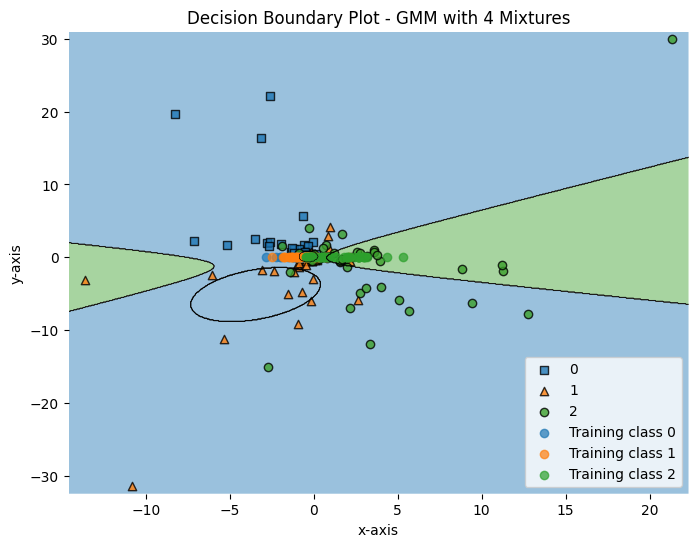

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics for GMM with 8 Mixtures:
Accuracy: 0.22
Precision for each class: [0.39473684 0.10344828 0.         0.         0.         0.        ]
Recall for each class: [0.6  0.06 0.   0.   0.   0.  ]
F-measure for each class: [0.47619048 0.07594937 0.         0.         0.         0.        ]
Mean Precision: 0.08303085299455536
Mean Recall: 0.10999999999999999
Mean F-measure: 0.09202330721318062
Confusion Matrix:
[[30  0  0  5  0 15]
 [30  3  0  1  5 11]
 [16 26  0  0  1  7]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]



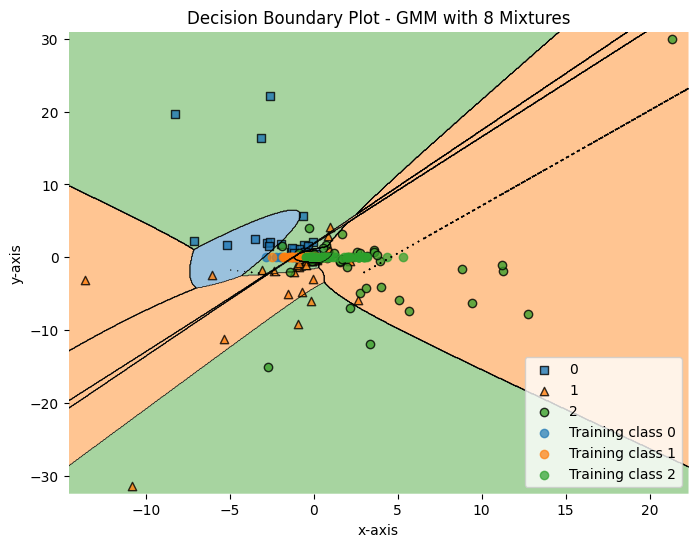

In [ ]:
mixtures = [1, 2, 4, 8]
gmm_models = [GaussianMixture(n_components=m).fit(X_train_lda) for m in mixtures]

# Step 5: Evaluate and print the performance metrics
for i, gmm in enumerate(gmm_models):
    y_pred_gmm = gmm.predict(X_test_lda)

    accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
    precision_gmm = precision_score(y_test, y_pred_gmm, average=None)
    recall_gmm = recall_score(y_test, y_pred_gmm, average=None)
    f1_gmm = f1_score(y_test, y_pred_gmm, average=None)

    mean_precision_gmm = np.mean(precision_gmm)
    mean_recall_gmm = np.mean(recall_gmm)
    mean_f1_gmm = np.mean(f1_gmm)

    conf_matrix_gmm = confusion_matrix(y_test, y_pred_gmm)

    print(f'Performance Metrics for GMM with {mixtures[i]} Mixtures:')
    print(f'Accuracy: {accuracy_gmm}')
    print(f'Precision for each class: {precision_gmm}')
    print(f'Recall for each class: {recall_gmm}')
    print(f'F-measure for each class: {f1_gmm}')
    print(f'Mean Precision: {mean_precision_gmm}')
    print(f'Mean Recall: {mean_recall_gmm}')
    print(f'Mean F-measure: {mean_f1_gmm}')
    print(f'Confusion Matrix:\n{conf_matrix_gmm}\n')

    # Decision region plots with superimposed 1-dimensional reduced dimensional representation of training data
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_test_lda, y_test, clf=gmm, legend=2)

    for c in np.unique(y_train):
        plt.scatter(X_train_lda[y_train == c, 0], np.zeros(np.sum(y_train == c)),
                    label=f'Training class {c}', marker='o', alpha=0.7)

    plt.title(f'Decision Boundary Plot - GMM with {mixtures[i]} Mixtures')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.show()

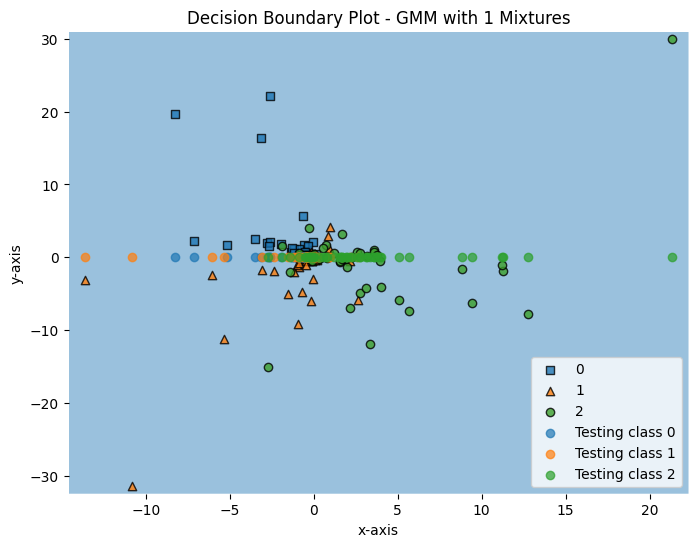

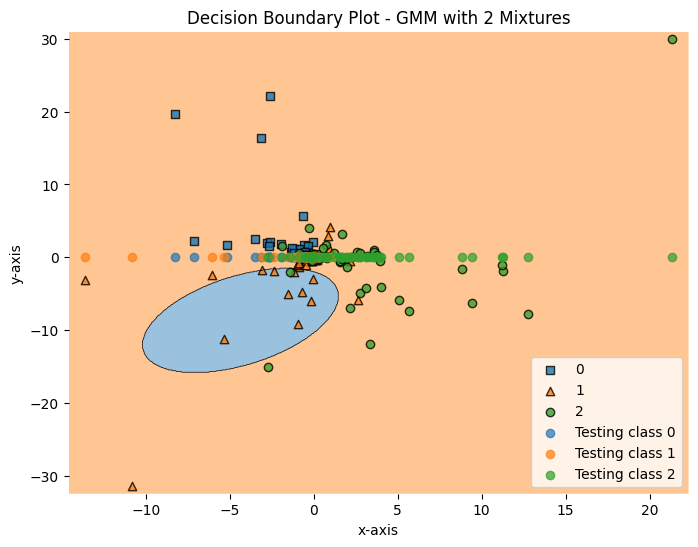

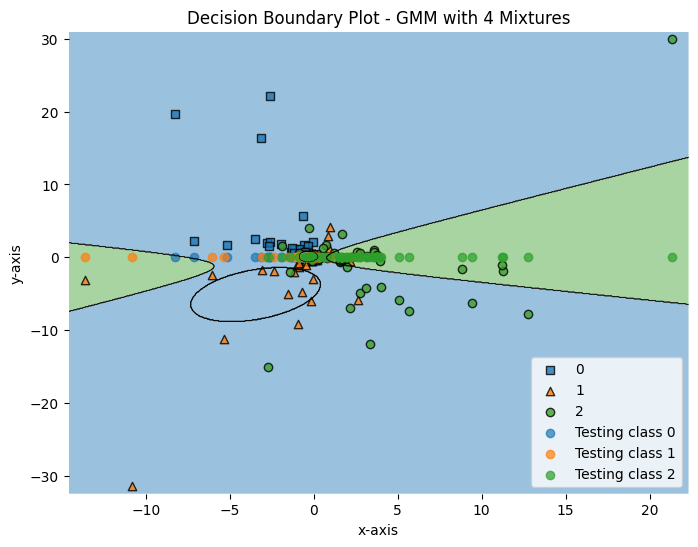

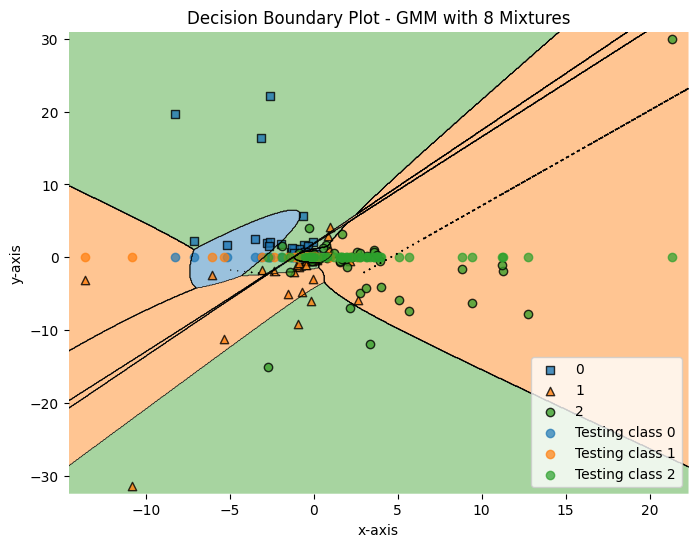

In [ ]:
for i, gmm in enumerate(gmm_models):
    # Decision region plots with superimposed 1-dimensional reduced-dimensional representation of testing data
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_test_lda, y_test, clf=gmm, legend=2)

    # Superimpose the 1-dimensional reduced-dimensional representation of testing data
    for c in np.unique(y_test):
        plt.scatter(X_test_lda[y_test == c, 0], np.zeros(np.sum(y_test == c)),
                    label=f'Testing class {c}', marker='o', alpha=0.7)

    plt.title(f'Decision Boundary Plot - GMM with {mixtures[i]} Mixtures')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend()
    plt.show()

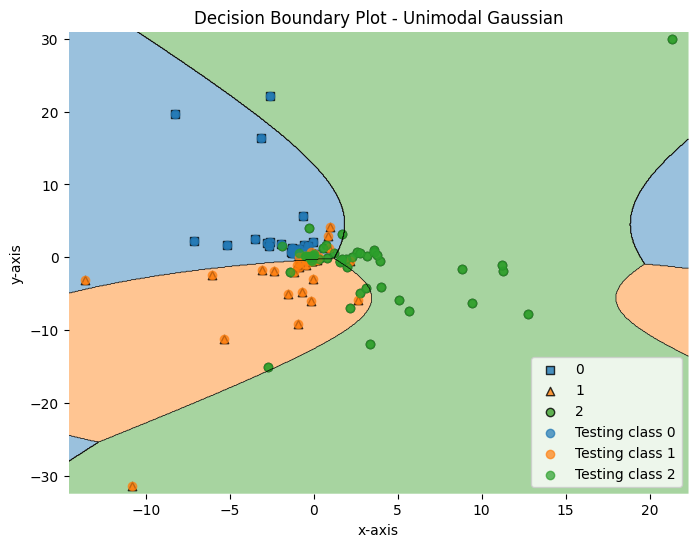

In [ ]:
plt.figure(figsize=(8, 6))
plot_decision_regions(X_test_lda, y_test, clf=gnb, legend=2)

# Superimpose the 2-dimensional reduced-dimensional representation of testing data
for c in np.unique(y_test):
    plt.scatter(X_test_lda[y_test == c, 0], X_test_lda[y_test == c, 1],
                label=f'Testing class {c}', marker='o', alpha=0.7)

plt.title('Decision Boundary Plot - Unimodal Gaussian')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.show()